In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphstats import *
from scipy.stats import mannwhitneyu as mwu

In [2]:
N = 200
SEED_RATIO = 0.1
MU = 100
PI = np.array([0.5, 0.5])
B = np.array([[0.52**2, 0.52*0.48], [0.52*0.48, 0.48**2]])
SCALE = 4
SCALES = np.array([[SCALE, SCALE], [SCALE, SCALE]])
ALPHA = 0.10

In [3]:
reps = 300

n1 = int(np.round(N*SEED_RATIO*PI[0]))
n2 = int(np.round(N*SEED_RATIO*(1 - PI[0])))

seeds1 = np.arange(0, n1)
seeds2 = np.arange(int(np.round(N*PI[0])), int(np.round(N*PI[0])) + n2)
all_seeds = np.concatenate((seeds1, seeds2))

labels1 = np.zeros(len(seeds1))
labels2 = np.ones(len(seeds2))
seed_labels = np.concatenate((labels1, labels2))

mu2s = np.arange(MU, MU + 3, step = 0.05)

correct_rejections = np.zeros(len(mu2s))
all_rejections = np.zeros(len(mu2s))

for i, mu2 in enumerate(tqdm(mu2s)):
    for j in range(reps):
        means = np.array([[MU, mu2], [mu2, MU]])
        A = adj_matrix(N, PI, B, True, dist = "normal", means = means, scales = SCALES, acorn = int(mu2**2 + i**2 + j**2))
        weights = get_weights(A, all_seeds, seed_labels)
        w11 = weights[0][0]
        w12 = weights[0][1]
        w22 = weights[1][1]
        
        T1, p1 = mwu(w11, w12)
        T2, p2 = mwu(w12, w22)
        
        if p1 < ALPHA and p2 < ALPHA:
            if np.mean(w11) < np.mean(w12) and np.mean(w22) < np.mean(w12) and MU < mu2:
                correct_rejections[i] += 1
                all_rejections[i] += 1
            elif np.mean(w11) > np.mean(w12) and MU > mu2 and np.mean(w22) > np.mean(w12):
                correct_rejections[i] += 1
                all_rejections[i] += 1
            else:
                all_rejections[i] += 1

100%|██████████| 60/60 [35:05<00:00, 35.86s/it]


In [4]:
correct_reject_ratio = correct_rejections/reps
all_reject_ratio = all_rejections/reps

In [5]:
correct_reject_ratio, all_reject_ratio

(array([0.        , 0.03      , 0.02      , 0.02      , 0.02666667,
        0.02666667, 0.04666667, 0.03333333, 0.04333333, 0.04333333,
        0.03666667, 0.04666667, 0.04333333, 0.06666667, 0.07333333,
        0.09333333, 0.09666667, 0.08666667, 0.07333333, 0.11333333,
        0.10333333, 0.09666667, 0.11333333, 0.11666667, 0.11333333,
        0.16666667, 0.11333333, 0.12666667, 0.19333333, 0.18333333,
        0.18333333, 0.19333333, 0.23      , 0.18666667, 0.23      ,
        0.22666667, 0.21666667, 0.34666667, 0.30333333, 0.31666667,
        0.34666667, 0.31666667, 0.33666667, 0.31333333, 0.41333333,
        0.39      , 0.37333333, 0.42      , 0.43333333, 0.44666667,
        0.42333333, 0.44666667, 0.48      , 0.50666667, 0.51666667,
        0.53      , 0.52666667, 0.56666667, 0.56333333, 0.58666667]),
 array([0.04333333, 0.06      , 0.04333333, 0.03666667, 0.04333333,
        0.04666667, 0.07666667, 0.05      , 0.06      , 0.05666667,
        0.05      , 0.06      , 0.06      , 0.

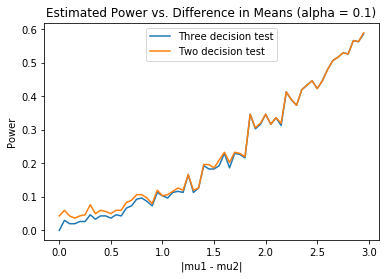

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(mu2s - MU, correct_reject_ratio, label = "Three decision test")
ax.plot(mu2s - MU, all_reject_ratio, label = "Two decision test")
ax.set_xlabel('|mu1 - mu2|')
ax.set_ylabel('Power')
ax.set_title('Estimated Power vs. Difference in Means (alpha = 0.1)')
ax.legend(loc = 'upper center')
plt.savefig('estimated_power_half')